<a href="https://colab.research.google.com/github/Silambarasan92-spec/Silambarasan-G/blob/main/Assignment_5_Cricket_Chirps_Silambarasan_G_DW28_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.isnull().sum()

Chirps_Second         0
Ground_Temperature    0
dtype: int64

In [ ]:
df.dtypes

Chirps_Second         float64
Ground_Temperature    float64
dtype: object

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
iqr = df.Chirps_Second.quantile(0.75) - df.Chirps_Second.quantile(0.25)
upper_threshold = df.Chirps_Second.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Chirps_Second.quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold

(12.9, 19.699999999999996)

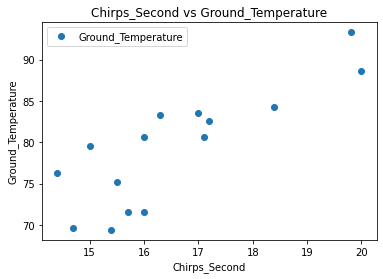

In [ ]:
df.plot (x="Chirps_Second",y="Ground_Temperature", style="o")
plt.title("Chirps_Second vs Ground_Temperature")
plt.xlabel("Chirps_Second")
plt.ylabel("Ground_Temperature")
plt.show() 

In [ ]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [ ]:
#There is a linear relationship b/w hours and score so no need of transformation is required

In [ ]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [ ]:
X = df.loc[:, ["Chirps_Second"]].values # Select all rows and columns except the last column as my features
y = df.loc[:,['Ground_Temperature']].values #targets as arrays

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
y_test

array([[82.6],
       [71.6],
       [69.7],
       [83.3],
       [83.5]])

In [ ]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [ ]:
X_test

array([[17.2],
       [15.7],
       [14.7],
       [16.3],
       [17. ]])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

[27.81256284]


In [ ]:
print(regressor.coef_)

[[3.11082561]]


In [ ]:
regressor.predict([[4]])

array([[40.25586527]])

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([[81.31876327],
       [76.65252486],
       [73.54169925],
       [78.51902022],
       [80.69659815]])

In [ ]:
df1 = pd.DataFrame ({'Actual': y_test,'Predicted': y_pred})
df1

ValueError: ignored

In [ ]:
regressor.predict([[15]])

array([[74.47494693]])

In [ ]:
from sklearn import metrics
#print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

0.6161464198783286

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 